# Lorenz 3d Animation with Matplotlib 

---
## Create Set Of Arbitrary Points to Animate
    I'm going to pretend that I have an engine mounted in four places and
    I want to animate the rigid body motion.

In [93]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

# arbitrary 'mode' frequency, or natural frequency
wn = 10

# arbitrary amount of time the animation should perform
t = np.arange(0,1000,1)

# arbitary eigenvectors for 6 free-body modes in 6DOF
eigv = [-3.406e-2, -1.654e-1, 1.672e-1, -9.988e-1, -3.823e-1, -7.623e-2]
# eigv = [-4.619e-1,  3.597e-1, -4.013e-4,  1.361e-2, -8.785e-1,  9.680e-1]
# eigv = [-8.862e-1, -9.180e-1, -9.860e-1, -4.679e-2,  2.864e-1,  2.389e-1]
# eigv = [-1.503e-2,  1.845e-3,  1.646e-3,  4.313e-5,  8.095e-4, -1.391e-3]
# eigv = [ 1.968e-3,  3.761e-3, -1.553e-3, -1.562e-3,  8.576e-3,  2.219e-3]
# eigv = [ 3.315e-3,  6.037e-3, -8.172e-3, -6.324e-4, -3.541e-3, -2.326e-3]

# generating inital arbitrary point cloud
eng = [1500, -10, 140]
pt1 = [1700, -250, 15]
pt2 = [1400, -250, 10]
pt3 = [1375, 200, 0]
pt4 = [1725, 200, 25]

p_cld = [eng, pt1, pt2, pt3, pt4]
pts   = np.array(p_cld)



#### Here I plot my point cloud array in a 3d scatter to get an idea of how it looks

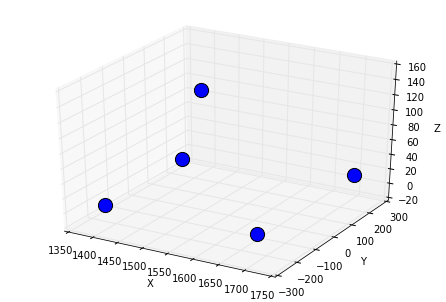

In [94]:
% matplotlib inline
fig = plt.figure()
ax  = fig.add_axes([0, 0, 1, 1], projection='3d')

for pt in pts:
    ax.scatter(pt[0],pt[1],pt[2], s=200, marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()
    

#### Now I must generate the data that governs how these points move

    - Basically I'm only generating data for the 'eng' point.
    - Movement in a specific DOF is dictated by that eigenvalue's
      relationship to the other eigenvalues in the eigenvector 
          - (+/-) for phase relationship
          - magnitude for scale relationship
          
    - After generating the data I will have to transform and rotate the rest
      of the values in the point cloud appropriately

In [95]:
def periodic_motion_gen(eigv, wn, time):
    #I probably want to increase the scale of the movement
    sf = 10  # scale factor
    dx = []    
    for eig in eigv:
        dx.append(eig*np.sin(wn*t)*sf)   
    np.array(dx)
    return np.transpose(dx)

dx = periodic_motion_gen(eigv, wn, t)

print np.shape(dx)

(1000, 6)


#### I need functions to do the following for a given point in time
    1. Translate point cloud by first 3DOF signal deltas
    2. Translate my point cloud to the origin via the 'eng' point
    3. Rotate by the last 3DOF signal deltas
    4. Translate the point cloud back to its position after step 1.
   
      

---
#### Translate Point Cloud Function

In [100]:
# I'm going to check to see if things look okay with just the 
# first time step as an input
t_check = dx[:5]

def trans_3DOF(points, dx_i):
    trans_3DOF_pnts = []
    
    for p in points:
        p[0] += dx_i[0]
        p[1] += dx_i[1]
        p[2] += dx_i[2]
        trans_3DOF_pnts.append(p)
    
    return np.array(trans_3DOF_pnts)

# checker
# pts = np.asarray([trans_3DOF(points=pts, dx_i=ti) for ti in t_check])
# print np.shape(pts)
# print pts


In [ ]:
def trans_2_origin(points):
    